In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
df = pd.read_csv('data/diabetic_data.csv', encoding = 'latin1',low_memory=False)

In [2]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/diabetic_data.csv', encoding = 'latin1',low_memory=False)
df.readmitted[df.readmitted == 'NO' ] = 0
df.readmitted[df.readmitted == '<30' ] = 1
df = df.drop(df[df.readmitted == '>30'].index)
df.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)
df.dropna(axis=1, how='all')
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['readmitted'])
#X = pd.get_dummies(X)

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
int_categorical_headers = [
'admission_type_id',
'discharge_disposition_id',
'admission_source_id',
]
numeric_headers = [
    "time_in_hospital", 
    "num_lab_procedures", 
    "num_procedures", 
    "num_medications", 
    "number_outpatient", 
    "number_emergency", 
    "number_inpatient", 
    "number_diagnoses",
]
categorical_headers = [
 'diag_3',
 'diag_2',
 'diag_1',
 'race',
 'gender',
 'age',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

df_train.replace(to_replace=' ?',value=np.nan, inplace=True)
df_train.dropna(inplace=True)
df_train.reset_index()

df_test.replace(to_replace=' ?',value=np.nan, inplace=True)
df_test.dropna(inplace=True)
df_test.reset_index()

encoders = dict()



for col in categorical_headers:
    df[col] = df[col].str.strip()
    df_train[col] = df_train[col].str.strip()
    df_test[col] = df_test[col].str.strip()
    

    encoders[col] = LabelEncoder()
    df[col+'_int'] = encoders[col].fit_transform(df[col])
    df_train[col+'_int'] = encoders[col].transform(df_train[col])
    df_test[col+'_int'] = encoders[col].transform(df_test[col])
    
    
    
for col in int_categorical_headers:
    df[col+'_int'] = df[col]
    df_train[col+'_int'] = df_train[col]
    df_test[col+'_int'] = df_test[col]

for col in numeric_headers:
    df_train[col] = df_train[col].astype(np.float)
    df_test[col] = df_test[col].astype(np.float)
    df[col] = df[col].astype(np.float)
    ss = StandardScaler()
    df[col] = ss.fit_transform(df[col].values.reshape(-1, 1))
    df_train[col] = ss.transform(df_train[col].values.reshape(-1, 1))
    df_test[col] = ss.transform(df_test[col].values.reshape(-1, 1))

    
df_train.head()

race  gender      age  admission_type_id  \
29551        Caucasian  Female  [30-40)                  2   
17226        Caucasian    Male  [80-90)                  3   
71236        Caucasian  Female  [80-90)                  2   
89387  AfricanAmerican  Female  [50-60)                  1   
46242  AfricanAmerican  Female  [50-60)                  2   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
29551                         1                    1          0.220462   
17226                        18                    1          0.555790   
71236                         3                    7          0.555790   
89387                         1                    7         -0.450195   
46242                         1                    7          0.220462   

       num_lab_procedures  num_procedures  num_medications    ...      \
29551           -0.390361       -0.225250        -0.820769    ...       
17226            0.167448        2.676636         2.757234    ...       
71236            1.283067       -0.805627        -0.224435    ...       
89387           -0.441071        0.355127        -0.343702    ...       
46242           -2.114500       -0.805627        -1.178569    ...       

       metformin-rosiglitazone_int  metformin-pioglitazone_int  change_int  \
29551                            0                           0           1   
17226                            0                           0           0   
71236                            0                           0           1   
89387                            0                           0           0   
46242                            0                           0           1   

      diabetesMed_int admission_type_id_int discharge_disposition_id_int  \
29551               1                     2                            1   
17226               1                     3                           18   
71236               0                     2                            3   
89387               1                     1                            1   
46242               1                     2                            1   

       admission_source_id_int diag_1_int diag_2_int diag_3_int  
29551                        1        682         41        V09  
17226                        1        414        599        998  
71236                        7        783        276        599  
89387                        7        531        585        403  
46242                        7        786        575        789  

[5 rows x 81 columns]

In [5]:
from sklearn import metrics as mt

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.layers import Embedding, Flatten, Merge, concatenate
from keras.models import Model

Using TensorFlow backend.


In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 386265763192127943
]


## Starting work on the actual deep and wide network

In [8]:
master_numeric_headers = numeric_headers + int_categorical_headers
categorical_headers_ints = [x+'_int' for x in categorical_headers]
df_num =  df[numeric_headers].values
X_train_num =  df_train[master_numeric_headers].values
X_test_num =  df_test[master_numeric_headers].values
y_train = df_train['readmitted'].values.astype(np.int)
y_test = df_test['readmitted'].values.astype(np.int)

In [15]:
print(master_categorical_headers)

Epoch 1/10
52976/52976 [==============================] - 10s - loss: 0.1491 - acc: 0.8279    
Epoch 2/10
52976/52976 [==============================] - 9s - loss: 0.1364 - acc: 0.8285     
Epoch 3/10
52976/52976 [==============================] - 9s - loss: 0.1341 - acc: 0.8293     
Epoch 4/10
52976/52976 [==============================] - 9s - loss: 0.1323 - acc: 0.8320     
Epoch 5/10
52976/52976 [==============================] - 9s - loss: 0.1313 - acc: 0.8337     
Epoch 6/10
52976/52976 [==============================] - 9s - loss: 0.1308 - acc: 0.8344     
Epoch 7/10
52976/52976 [==============================] - 9s - loss: 0.1306 - acc: 0.8346     
Epoch 8/10
52976/52976 [==============================] - 9s - loss: 0.1304 - acc: 0.8350     
Epoch 9/10
52976/52976 [==============================] - 9s - loss: 0.1303 - acc: 0.8351     
Epoch 10/10
52976/52976 [==============================] - ETA: 0s - loss: 0.1302 - acc: 0.835 - 9s - loss: 0.1302 - acc: 0.8350     


In [40]:
cross_columns = [['gender','race'],
                 ['age', 'diag_1'],
                ['gender', 'diag_1']]

[[10876    97]
 [ 2078   194]] 0.835787089468


In [11]:
## 1) Standard Configuration Wide and Deep Network

In [12]:
# we need to create separate sequential models for each embedding
import tensorflow as tf
with tf.device('/GPU:0'):
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        # needs to be commented better, Eric!
        X_crossed_train = df_train[cols].apply(lambda x: '_'.join(x), axis=1)
        X_crossed_test = df_test[cols].apply(lambda x: '_'.join(x), axis=1)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
        x = Flatten()(x)
        all_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_branch_outputs)

    # reset this input branch
    all_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( df_train[col].values )
        X_ints_test.append( df_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
        x = Flatten()(x)
        all_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),sparse=False,name='numeric_data'))
    x = Dense(units=20, activation='relu')(all_inputs[-1])
    all_branch_outputs.append( x )

    # merge the branches together
    deep_branch = concatenate(all_branch_outputs)
    deep_branch = Dense(units=50,activation='relu')(deep_branch)
    deep_branch = Dense(units=10,activation='relu')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch])
    final_branch = Dense(units=1,activation='sigmoid')(final_branch)

    model1 = Model(inputs=all_inputs, outputs=final_branch)

    model1.compile(optimizer='adagrad',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model1.fit(X_ints_train+ [X_train_num],
            y_train, epochs=10, batch_size=32, verbose=1)

[3 9 3 ..., 3 3 3]
[ 552 2660 2824 ...,  540  981 1855]
[416 819 467 ..., 401 471 357]


## 2) Deeper "Deep Network"

In [15]:
# we need to create separate sequential models for each embedding
import tensorflow as tf
with tf.device('/cpu:0'):
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        # needs to be commented better, Eric!
        X_crossed_train = df_train[cols].apply(lambda x: '_'.join(x), axis=1)
        X_crossed_test = df_test[cols].apply(lambda x: '_'.join(x), axis=1)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
        x = Flatten()(x)
        all_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_branch_outputs)

    # reset this input branch
    all_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( df_train[col].values )
        X_ints_test.append( df_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
        x = Flatten()(x)
        all_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),sparse=False,name='numeric_data'))
    x = Dense(units=20, activation='relu')(all_inputs[-1])
    all_branch_outputs.append( x )

    # merge the branches together
    deep_branch = concatenate(all_branch_outputs)
    deep_branch = Dense(units=50,activation='relu')(deep_branch)
    deep_branch = Dense(units=10,activation='relu')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch])
    final_branch = Dense(units=50,activation='sigmoid')(final_branch)
    final_branch = Dense(units=1,activation='sigmoid')(final_branch)

    model3 = Model(inputs=all_inputs, outputs=final_branch)

    model3.compile(optimizer='Adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model3.fit(X_ints_train+ [X_train_num],
            y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
52976/52976 [==============================] - 14s - loss: 0.4230 - acc: 0.8345    
Epoch 2/10
52976/52976 [==============================] - 13s - loss: 0.4105 - acc: 0.8368    
Epoch 3/10
52976/52976 [==============================] - 13s - loss: 0.4048 - acc: 0.8375    
Epoch 4/10
52976/52976 [==============================] - 13s - loss: 0.4008 - acc: 0.8382    
Epoch 5/10
52976/52976 [==============================] - 13s - loss: 0.3979 - acc: 0.8388    
Epoch 6/10
52976/52976 [==============================] - 12s - loss: 0.3957 - acc: 0.8393    
Epoch 7/10
52976/52976 [==============================] - 12s - loss: 0.3941 - acc: 0.8394    
Epoch 8/10
52976/52976 [==============================] - 12s - loss: 0.3927 - acc: 0.8400    
Epoch 9/10
52976/52976 [==============================] - 12s - loss: 0.3916 - acc: 0.8401    
Epoch 10/10
52976/52976 [==============================] - 12s - loss: 0.3907 - acc: 0.8407    


In [16]:
yhat = np.round(model.predict(X_ints_test + [X_test_num]))
print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))

[[10734   239]
 [ 2013   259]] 0.829973574934


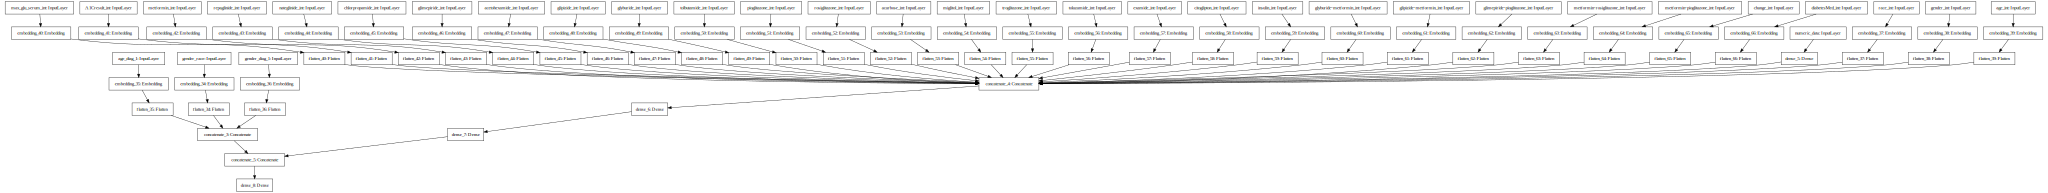

In [17]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [47]:
def run_network(IN_Train, IN_Test):
    print(2)
    categorical_headers_ints = [x+'_int' for x in categorical_headers]
    df_num =  IN_Train[numeric_headers].values
    X_train_num =  IN_Train[numeric_headers].values
    X_test_num =  IN_Test[numeric_headers].values
    y_train = IN_Train['readmitted'].values.astype(np.int)
    y_test = IN_Test['readmitted'].values.astype(np.int)

    import tensorflow as tf
    with tf.device('/cpu:0'):
        embed_branches = []
        X_ints_train = []
        X_ints_test = []
        all_inputs = []
        all_branch_outputs = []

        for cols in cross_columns:
            # encode crossed columns as ints for the embedding
            enc = LabelEncoder()

            # create crossed labels
            # needs to be commented better, Eric!
            X_crossed_train = IN_Train[cols].apply(lambda x: '_'.join(x), axis=1)
            X_crossed_test = IN_Test[cols].apply(lambda x: '_'.join(x), axis=1)

            enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
            X_crossed_train = enc.transform(X_crossed_train)
            X_crossed_test = enc.transform(X_crossed_test)
            X_ints_train.append( X_crossed_train )
            X_ints_test.append( X_crossed_test )

            # get the number of categories
            N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

            # create embedding branch from the number of categories
            inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
            all_inputs.append(inputs)
            x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
            x = Flatten()(x)
            all_branch_outputs.append(x)

        # merge the branches together
        wide_branch = concatenate(all_branch_outputs)

        # reset this input branch
        all_branch_outputs = []
        # add in the embeddings
        for col in categorical_headers_ints:
            # encode as ints for the embedding
            X_ints_train.append( IN_Train[col].values )
            X_ints_test.append( IN_Test[col].values )

            # get the number of categories
            N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

            # create embedding branch from the number of categories
            inputs = Input(shape=(1,),dtype='int32', name=col)
            all_inputs.append(inputs)
            x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
            x = Flatten()(x)
            all_branch_outputs.append(x)

        # also get a dense branch of the numeric features
        all_inputs.append(Input(shape=(X_train_num.shape[1],),sparse=False,name='numeric_data'))
        x = Dense(units=20, activation='relu')(all_inputs[-1])
        all_branch_outputs.append( x )

        # merge the branches together
        deep_branch = concatenate(all_branch_outputs)
        deep_branch = Dense(units=50,activation='relu')(deep_branch)
        deep_branch = Dense(units=10,activation='relu')(deep_branch)

        final_branch = concatenate([wide_branch, deep_branch])
        final_branch = Dense(units=1,activation='sigmoid')(final_branch)
        model = None
        model = Model(inputs=all_inputs, outputs=final_branch)
        model.compile(optimizer='adagrad',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        model.fit(X_ints_train+ [X_train_num],
                y_train, epochs=3, batch_size=32, verbose=1)
        yhat = np.round(model.predict(X_ints_test + [X_test_num]))
        print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))
        

In [1]:
run_network(df_train, df_test)

NameError: name 'run_network' is not defined

In [55]:
df_train.drop(['readmitted'], axis = 1).shape

(52976, 80)

In [56]:
df_train['readmitted'].shape

(52976,)

In [54]:
#CV, uses function above
#in theory, this should treat df_train as our dataset, and split it, but it breaks when we use the cross val to split it
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

skf = StratifiedKFold(n_splits=10, shuffle=True)
for train, test in skf.split(df_train.drop(['readmitted'], axis = 1), df_train['readmitted']):
        print(train, test)
        run_network(df_train[train], df_train[test]) #TODO: problem where we use the indicies from skf

[    0     1     2 ..., 52973 52974 52975] [   20    38    40 ..., 52929 52933 52939]


KeyError: '[    0     1     2 ..., 52973 52974 52975] not in index'